In [1]:
from netCDF4 import Dataset
import numpy as np
import os
def simulated_failure(chance, *shape):
    x = np.random.rand(*shape)
    return np.array(x > (chance/100.), dtype=np.uint8)

In [2]:
def compute_uncompressed(count, variable_count=1, filepath='/tmp/sample_dataset.nc'):
    if os.path.exists(filepath):
        os.remove(filepath)
    with Dataset(filepath, 'w') as nc:
        nc.title = 'Sample Dataset'
        print "Creating dimension of size %s" % count
        nc.createDimension('idx', count)
        nc.createVariable('idx', np.int, ('idx',))
        nc.variables['idx'][:] = np.arange(count)
        for i in xrange(variable_count):
            varname = 'qc_code_%s' % i
            nc.createVariable(varname, np.uint8, ('idx',))
            nc.variables[varname][:] = simulated_failure(1, count)
    filesize = os.stat(filepath).st_size
    return filesize


In [3]:
var_count = np.arange(1,11)
var_size = np.linspace(1, 1000000, 9, dtype=int)
size_matrix = np.zeros([var_count.shape[0], var_size.shape[0]], np.int)
for i,num_vars in enumerate(var_count):
    for j,dataset_size in enumerate(var_size):
        size_matrix[i][j] = compute_uncompressed(dataset_size,num_vars)

Creating dimension of size 1
Creating dimension of size 125000
Creating dimension of size 250000
Creating dimension of size 375000
Creating dimension of size 500000
Creating dimension of size 625000
Creating dimension of size 750000
Creating dimension of size 875000
Creating dimension of size 1000000
Creating dimension of size 1
Creating dimension of size 125000
Creating dimension of size 250000
Creating dimension of size 375000
Creating dimension of size 500000
Creating dimension of size 625000
Creating dimension of size 750000
Creating dimension of size 875000
Creating dimension of size 1000000
Creating dimension of size 1
Creating dimension of size 125000
Creating dimension of size 250000
Creating dimension of size 375000
Creating dimension of size 500000
Creating dimension of size 625000
Creating dimension of size 750000
Creating dimension of size 875000
Creating dimension of size 1000000
Creating dimension of size 1
Creating dimension of size 125000
Creating dimension of size 2500

In [4]:
%matplotlib inline

In [5]:
from matplotlib import pyplot as plt

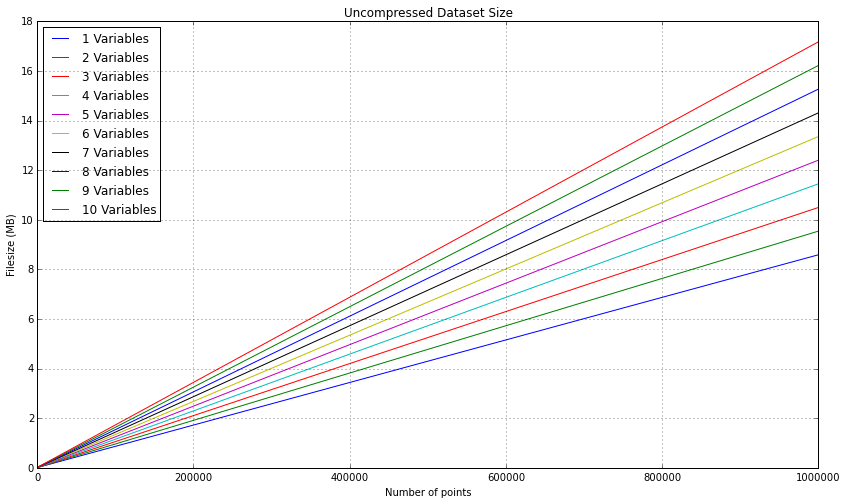

In [7]:
import matplotlib
fig, ax = plt.subplots(figsize=(14,8))
ax.set_title("Uncompressed Dataset Size")
ax.grid(True)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
y_formatter.set_scientific(False)
ax.yaxis.set_major_formatter(y_formatter)
ax.set_xlabel('Number of points')
ax.set_ylabel('Filesize (MB)')
for i,num_vars in enumerate(var_count):
    handle = ax.plot(var_size, size_matrix[i,:] / (1024. * 1024), label='%s Variables' % num_vars)
ax.legend(loc='best')

In [9]:
size_matrix[0][-1]

9006651

In [10]:
def compute_compressed(count, variable_count=1, filepath='/tmp/sample_dataset.nc'):
    if os.path.exists(filepath):
        os.remove(filepath)
    with Dataset(filepath, 'w') as nc:
        nc.title = 'Sample Dataset'
        print "Creating dimension of size %s" % count
        nc.createDimension('idx', count)
        nc.createVariable('idx', np.int, ('idx',), zlib=True)
        nc.variables['idx'][:] = np.arange(count)
        for i in xrange(variable_count):
            varname = 'qc_code_%s' % i
            nc.createVariable(varname, np.uint8, ('idx',))
            nc.variables[varname][:] = simulated_failure(1, count)
    filesize = os.stat(filepath).st_size
    return filesize

In [11]:
var_count = np.arange(1,11)
var_size = np.linspace(1, 1000000, 9, dtype=int)
size_matrix = np.zeros([var_count.shape[0], var_size.shape[0]], np.int)
for i,num_vars in enumerate(var_count):
    for j,dataset_size in enumerate(var_size):
        size_matrix[i][j] = compute_compressed(dataset_size,num_vars)


Creating dimension of size 1
Creating dimension of size 125000
Creating dimension of size 250000
Creating dimension of size 375000
Creating dimension of size 500000
Creating dimension of size 625000
Creating dimension of size 750000
Creating dimension of size 875000
Creating dimension of size 1000000
Creating dimension of size 1
Creating dimension of size 125000
Creating dimension of size 250000
Creating dimension of size 375000
Creating dimension of size 500000
Creating dimension of size 625000
Creating dimension of size 750000
Creating dimension of size 875000
Creating dimension of size 1000000
Creating dimension of size 1
Creating dimension of size 125000
Creating dimension of size 250000
Creating dimension of size 375000
Creating dimension of size 500000
Creating dimension of size 625000
Creating dimension of size 750000
Creating dimension of size 875000
Creating dimension of size 1000000
Creating dimension of size 1
Creating dimension of size 125000
Creating dimension of size 2500

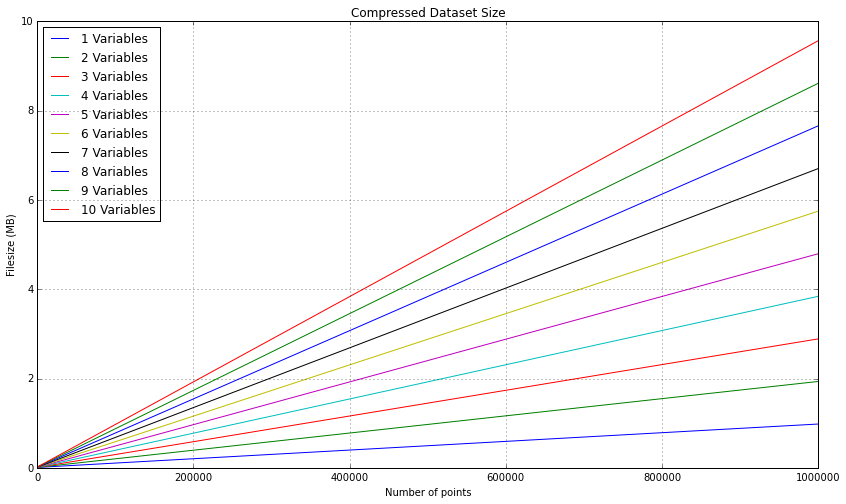

In [14]:
import matplotlib
fig, ax = plt.subplots(figsize=(14,8))
ax.set_title("Compressed Dataset Size")
ax.grid(True)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
y_formatter.set_scientific(False)
ax.yaxis.set_major_formatter(y_formatter)
ax.set_xlabel('Number of points')
ax.set_ylabel('Filesize (MB)')
for i,num_vars in enumerate(var_count):
    handle = ax.plot(var_size, size_matrix[i,:] / (1024. * 1024), label='%s Variables' % num_vars)
ax.legend(loc='best')


In [15]:
def compute_data_size(count, variable_count=1, filepath='/tmp/sample_dataset.nc'):
    if os.path.exists(filepath):
        os.remove(filepath)
    with Dataset(filepath, 'w') as nc:
        nc.title = 'Sample Dataset'
        print "Creating dimension of size %s" % count
        nc.createDimension('idx', count)
        nc.createVariable('idx', np.int, ('idx',))
        nc.variables['idx'][:] = np.arange(count)
        for i in xrange(variable_count):
            varname = 'qc_code_%s' % i
            nc.createVariable(varname, np.float, ('idx',))
            nc.variables[varname][:] = np.random.rand(count)
    filesize = os.stat(filepath).st_size
    return filesize

compute_data_size(24 * 3600 * 360, 30)

Creating dimension of size 31104000


7713812653

In [16]:
7713812653 / (1024. * 1024)

7356.465008735657

In [17]:
_/1024.

7.184047860093415